In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [45]:
#df_cass_uncom_new = pd.read_csv("results_cassandra_3_uncompressed.csv")
df_mysql = pd.read_csv("results_mysql_uncompressed.csv", usecols = ["Reference_time","Disk_Usage"])
df_mysql.head()

,Reference_time,Disk_Usage
0,0,199.724
1,2,199.732
2,3,199.744
3,4,199.748
4,5,199.756


In [46]:
df_mysql.dropna()
df_mysql['Reference_time'] = df_mysql['Reference_time'].astype("Int64")
df_mysql['Disk_Usage'] = df_mysql['Disk_Usage'].astype("float64")

In [4]:
#df_mysql["Reference_time"] = MinMaxScaler().fit_transform(np.array(df_mysql["Reference_time"]).reshape(-1,1))
#scaler = MinMaxScaler()
#df_mysql["Disk_Usage"] = scaler.fit_transform(np.array(df_mysql["Disk_Usage"]).reshape(-1,1))

In [47]:
X = df_mysql[['Reference_time']]
Y = df_mysql['Disk_Usage']
X

,Reference_time
0,0
1,2
2,3
3,4
4,5
...,...
21801,25397
21802,25398
21803,25400
21804,25401


In [48]:
regressor_mysql_uncomp = LinearRegression()

In [49]:
regressor_mysql_uncomp.fit(X, Y)

LinearRegression()

In [50]:
mysql_uncomp_pred = regressor_mysql_uncomp.predict(X)

In [51]:
#mysql_uncomp_pred_ = scaler.inverse_transform([mysql_uncomp_pred])

In [52]:
regressor_mysql_uncomp.score(X,Y)

0.9997951107867391

In [53]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y, mysql_uncomp_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y, mysql_uncomp_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y, mysql_uncomp_pred)))

Mean Absolute Error: 0.3994887663111782
Mean Squared Error: 0.4265251593938665
Root Mean Squared Error: 0.6530889368178475


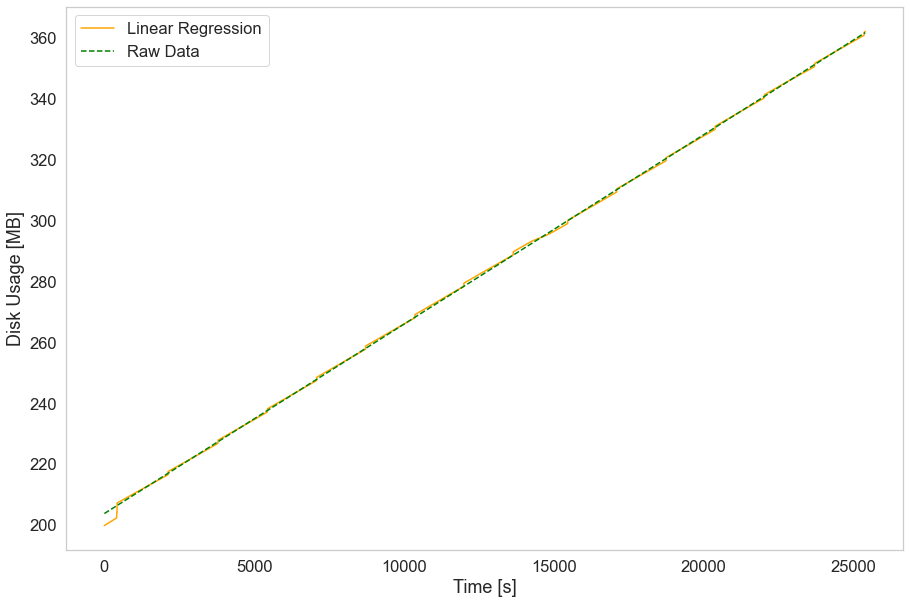

In [69]:
fig3 = plt.figure(figsize=(15, 10))
ax = fig3.add_subplot(1, 1, 1)
sns.set(font_scale = 1.5)
sns.set_style("whitegrid", {'axes.grid' : False})

ax = sns.lineplot(data=df_mysql, x="Reference_time", y="Disk_Usage",color="orange")
#plt.plot(df_mysql, color = "orange", linestyle = "--")
ax.plot(X, mysql_uncomp_pred, color = "green", linestyle="--")
ax.set(xlabel='Time [s]', ylabel='Disk Usage [MB]')
#yticks = [200, 220, 240, 260, 280, 300, 320, 340, 360]
#ax.set_yticks(yticks)
#ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18)
plt.legend(["Linear Regression", "Raw Data"], loc = "upper left")
#plt.title("Linear regression on MySQL", pad =  20)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\plots_prediction_models\mysql_prediction_model.png", dpi = 300)
plt.savefig(r"C:\Users\anush\reinfl\reinfl_environment\plots_prediction_models\mysql_prediction_model.pdf", dpi = 300)

In [66]:
import pickle
filename = 'sql_model.sav'
pickle.dump(regressor_mysql_uncomp, open(filename, 'wb'))

In [18]:
loaded_model = pickle.load(open(filename, 'rb'))

In [19]:
x = [20000]
loaded_model.predict([x])

C:\Users\anush\reinfl\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([328150.66907656])